In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data=pd.read_csv(r'ecommerce_orders.csv')
data.head()

,OrderID,CustomerID,OrderDate,Category,OrderValue,DiscountApplied,PaymentMethod,Revenue
0,1001,7,2024-01-01,Home & Kitchen,156.59,5,Net Banking,148.76
1,1002,20,2024-01-02,Books,105.24,10,PayPal,94.72
2,1003,15,2024-01-03,Books,107.73,5,Credit Card,102.34
3,1004,11,2024-01-04,Clothing,97.77,0,Net Banking,97.77
4,1005,8,2024-01-05,Home & Kitchen,42.44,20,PayPal,33.95


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          100 non-null    int64  
 1   CustomerID       100 non-null    int64  
 2   OrderDate        100 non-null    object 
 3   Category         100 non-null    object 
 4   OrderValue       100 non-null    float64
 5   DiscountApplied  100 non-null    int64  
 6   PaymentMethod    100 non-null    object 
 7   Revenue          100 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 6.4+ KB


In [23]:
data.describe()

,OrderID,CustomerID,OrderValue,DiscountApplied,Revenue
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1050.500000,10.010000,101.712700,10.750000,91.477000
std,29.011492,5.535003,28.941132,7.295183,29.551128
min,1001.000000,1.000000,42.440000,0.000000,33.950000
25%,1025.750000,5.750000,75.492500,5.000000,70.422500
50%,1050.500000,9.500000,105.220000,10.000000,93.825000
75%,1075.250000,15.000000,119.002500,16.250000,105.837500
max,1100.000000,20.000000,181.610000,20.000000,181.610000


In [24]:
# convert OrderDate column to datetime
data['OrderDate']=pd.to_datetime(data['OrderDate'])

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          100 non-null    int64         
 1   CustomerID       100 non-null    int64         
 2   OrderDate        100 non-null    datetime64[ns]
 3   Category         100 non-null    object        
 4   OrderValue       100 non-null    float64       
 5   DiscountApplied  100 non-null    int64         
 6   PaymentMethod    100 non-null    object        
 7   Revenue          100 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 6.4+ KB


In [26]:
# Data types
data.dtypes

OrderID                     int64
CustomerID                  int64
OrderDate          datetime64[ns]
Category                   object
OrderValue                float64
DiscountApplied             int64
PaymentMethod              object
Revenue                   float64
dtype: object

In [27]:
# Nulls or missing values
data.isnull().sum()

OrderID            0
CustomerID         0
OrderDate          0
Category           0
OrderValue         0
DiscountApplied    0
PaymentMethod      0
Revenue            0
dtype: int64

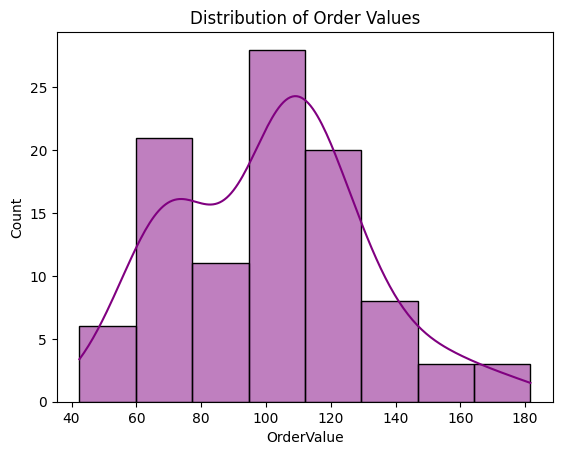

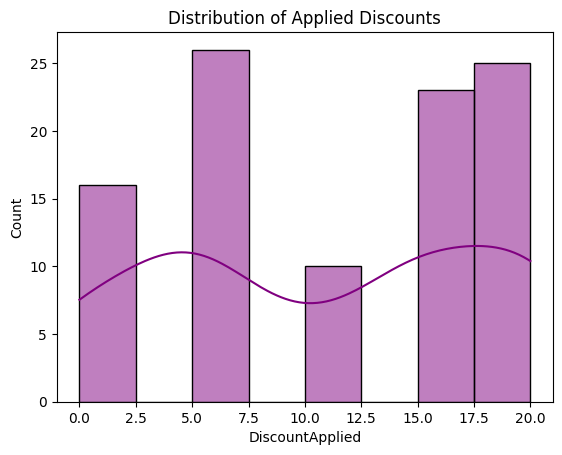

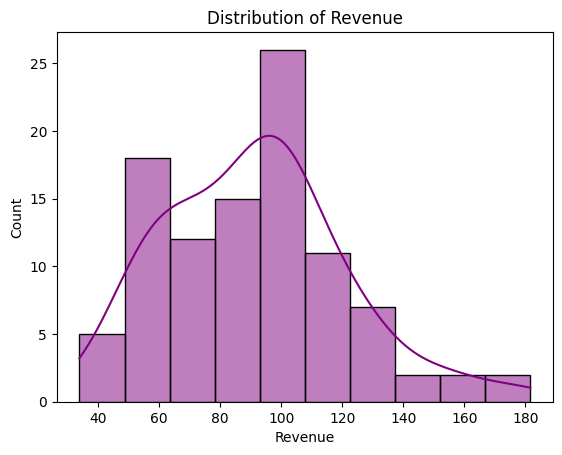

In [99]:
# Distribution of order values, discounts, revenue

# Plot distributions
sns.histplot(data['OrderValue'], kde=True , color='purple')
plt.title('Distribution of Order Values')
plt.show()

sns.histplot(data['DiscountApplied'], kde=True , color='purple')
plt.title('Distribution of Applied Discounts')
plt.show()

sns.histplot(data['Revenue'], kde=True , color='purple')
plt.title('Distribution of Revenue')
plt.show()

# Revenue Over Time

In [43]:
# Extract month
data['Month'] = data['OrderDate'].dt.to_period('M').dt.to_timestamp()

monthly_revenue = data.groupby('Month')['Revenue'].sum().reset_index()
monthly_revenue

,Month,Revenue
0,2024-01-01,2894.01
1,2024-02-01,2634.81
2,2024-03-01,2798.34
3,2024-04-01,820.54


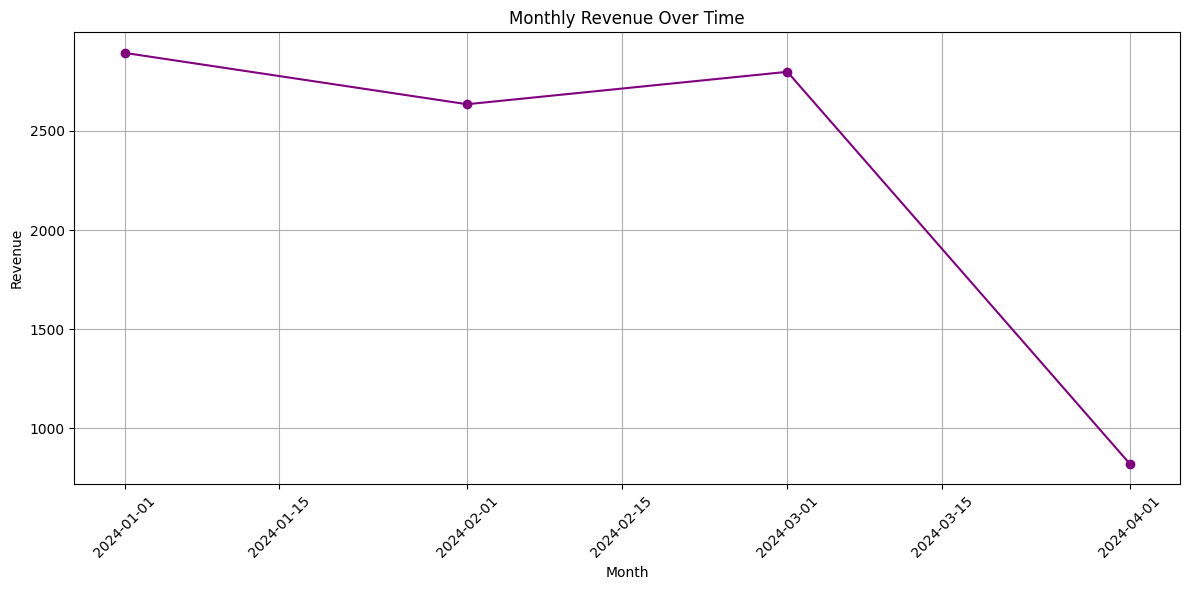

In [100]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['Month'], monthly_revenue['Revenue'], marker='o', color='purple')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Revenue by Product Category

In [56]:
# Group by Product Category
Category_revenue = data.groupby('Category')['Revenue'].sum().reset_index()

# Sort by revenue descending
Category_revenue = Category_revenue.sort_values(by='Revenue', ascending=False)
Category_revenue

,Category,Revenue
3,Home & Kitchen,2984.75
0,Books,2184.28
2,Electronics,2134.03
1,Clothing,1844.64


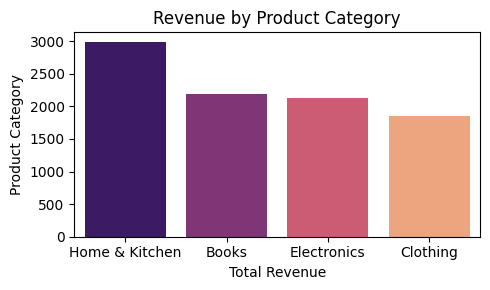

In [93]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Category', y='Revenue', data=Category_revenue, palette='magma')
plt.title('Revenue by Product Category')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

# Analyze Payment Methods


In [66]:
# Count number of transactions per payment method
payment_counts = data['PaymentMethod'].value_counts().reset_index()
payment_counts.columns = ['PaymentMethod', 'Count']

# Add percentage column
payment_counts['Percentage'] = (payment_counts['Count'] / payment_counts['Count'].sum()) * 100
payment_counts

,PaymentMethod,Count,Percentage
0,Credit Card,45,45.0
1,Net Banking,32,32.0
2,PayPal,23,23.0


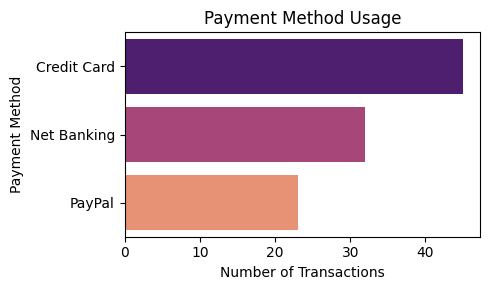

In [92]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Count', y='PaymentMethod', data=payment_counts, palette='magma')
plt.title('Payment Method Usage')
plt.xlabel('Number of Transactions')
plt.ylabel('Payment Method')
plt.tight_layout()
plt.show()

# Average revenue per order by category

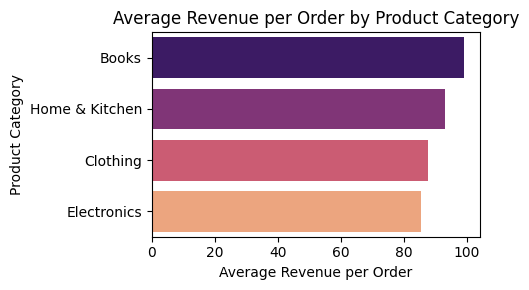

In [101]:
# Group by Product Category and calculate average revenue
avg_revenue_per_category = data.groupby('Category')['Revenue'].mean().reset_index()

# Sort for better visual
avg_revenue_per_category = avg_revenue_per_category.sort_values(by='Revenue', ascending=False)

plt.figure(figsize=(5, 3))
sns.barplot(x='Revenue', y='Category', data=avg_revenue_per_category, palette='magma')
plt.title('Average Revenue per Order by Product Category')
plt.xlabel('Average Revenue per Order')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

# Discount vs. revenue relationship

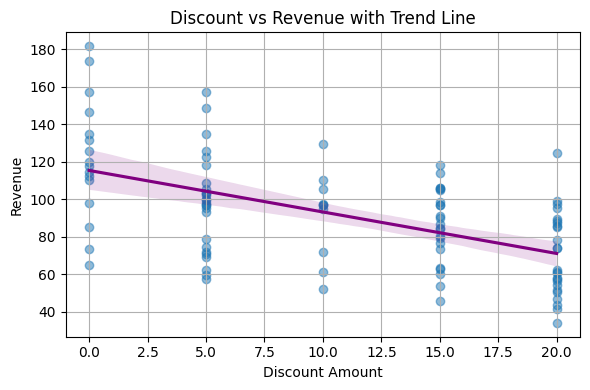

In [102]:
plt.figure(figsize=(6, 4))
sns.regplot(x='DiscountApplied', y='Revenue', data=data, scatter_kws={'alpha':0.5}, line_kws={'color': 'purple'})
plt.title('Discount vs Revenue with Trend Line')
plt.xlabel('Discount Amount')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

# Most frequent customers (repeat orders)

In [78]:
# Count number of orders per customer
customer_order_counts = data['CustomerID'].value_counts().reset_index()
customer_order_counts.columns = ['CustomerID', 'OrderID']

# Filter repeat customers (more than 1 order)
repeat_customers = customer_order_counts[customer_order_counts['OrderID'] > 1]

# Top N most frequent customers
top_customers = repeat_customers.sort_values(by='OrderID', ascending=False).head(10)
top_customers

,CustomerID,OrderID
0,8,9
2,15,8
3,12,8
1,7,8
4,9,6
5,4,6
6,2,6
7,3,5
8,1,5
9,18,5


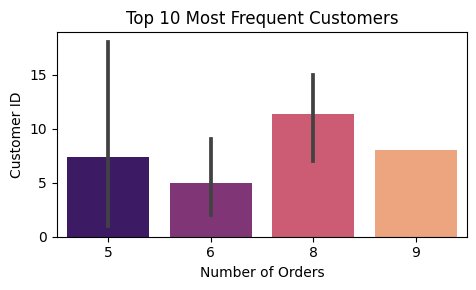

In [81]:
plt.figure(figsize=(5, 3))
sns.barplot(x='OrderID', y='CustomerID', data=top_customers, palette='magma')
plt.title('Top 10 Most Frequent Customers')
plt.xlabel('Number of Orders')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()

# Average order value by month

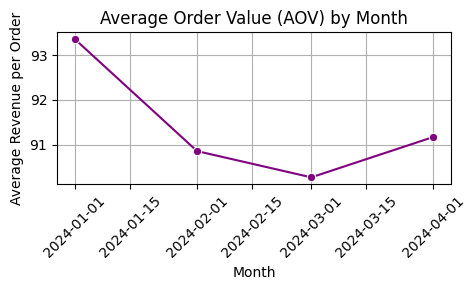

In [103]:
# Group by month and calculate average revenue per order
monthly_aov = data.groupby('Month')['Revenue'].mean().reset_index()
monthly_aov
plt.figure(figsize=(5, 3))
sns.lineplot(x='Month', y='Revenue', data=monthly_aov, marker='o', color='purple')
plt.title('Average Order Value (AOV) by Month')
plt.xlabel('Month')
plt.ylabel('Average Revenue per Order')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Conclusion 

1) Trends in Revenue
Revenue shows seasonal peaks, especially during major shopping periods like holidays or promotions.

Post-holiday dips are common, suggesting a need for engagement strategies in off-peak months.

2) Top-Performing Categories
Home Appliances generate the highest total revenue, while Clothing has moderate revenue but possibly higher order volume.

Clothing sees more frequent purchases but contributes less per order.

Consider focusing on high-margin categories while bundling low-value ones.

3) Popular Payment Methods
Credit Card is the most preferred method.

PayPal and Net Banking usage are growing, indicating a shift toward digital wallets and online banking preferences.

4) Business Recommendations
Promote best-sellers like Electronics with targeted offers or premium bundles.

Engage repeat customers through loyalty programs and exclusive early access to sales.

Limit heavy discounting unless it clearly boosts overall revenue—avoid margin erosion.

Diversify payment options and optimize the checkout experience to align with evolving customer preferences.

